<a href="https://colab.research.google.com/github/Shashank-Holla/TSAI-EVA6-Phase1/blob/main/07-%20Advanced%20Concepts/CIFAR10_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification on Cifar10 dataset

## Objective:


## Observations:



## Necessary packages

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchsummary import summary

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, utils

import numpy as np
!pip install -U -q git+https://github.com/albu/albumentations --no-cache-dir
# print('Albumentations version:',albumentations.__version__)

In [2]:
from CIFAR10 import cifar10
from albumentation_transform import *
from utils import *
from test import *
from train import *
from cifar_model import *

## Visualize data

In [3]:
viz_data = cifar10(root='./data', train=True, download=True, transform=None)
classes = viz_data.classes

Files already downloaded and verified


In [4]:
print("Classes of CIFAR10 dataset", classes)

Classes of CIFAR10 dataset ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
print(dataset_calculate_mean_std())

Files already downloaded and verified
Files already downloaded and verified
([0.24697121432552785, 0.24338893940435022, 0.2615925905215076], [0.4918687788500817, 0.4826539051649305, 0.44717727749693625])


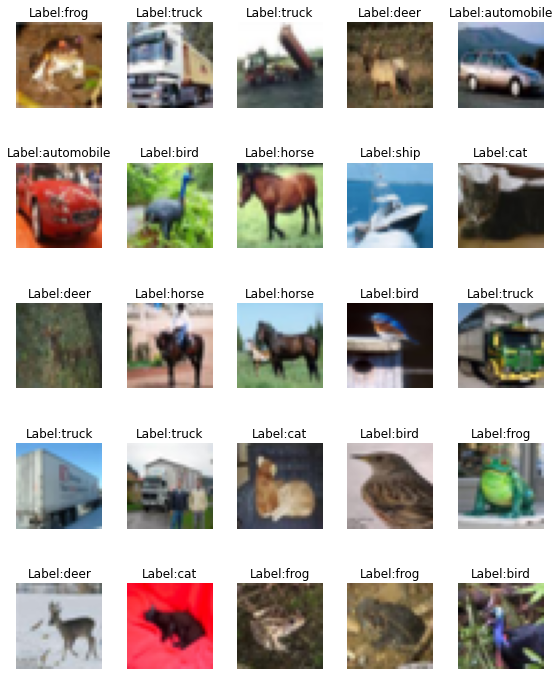

In [6]:
visualize_data(viz_data,classes)

## Prepare dataset, apply transform and prepare Dataloader

In [7]:
train_transform = albumentation_transform(train=True, mean=[0.4919, 0.4827, 0.4472], stddev=[0.2470, 0.2434, 0.2616])
test_transform = albumentation_transform(train=False, mean=[0.4919, 0.4827, 0.4472], stddev=[0.2470, 0.2434, 0.2616])

In [8]:
train_dataset = cifar10(root='./data', train=True, download=True, transform=train_transform)
test_dataset = cifar10(root='./data', train=False, download=True, transform=test_transform)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True}
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, **kwargs)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
sample_images, sample_labels = next(iter(train_loader))

In [10]:
sample_images.shape

torch.Size([128, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 133, 133])


(-0.5, 132.5, 132.5, -0.5)

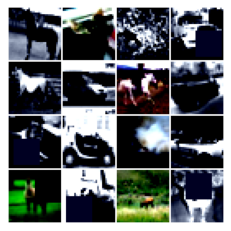

In [11]:
grid_image = utils.make_grid(sample_images[:16], nrow=4, padding=1, pad_value=1)
print(grid_image.shape)
plt.imshow(grid_image.permute(1,2,0))
plt.axis('off')

## Model

In [12]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available device:",device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

Available device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 16, 32, 32]           2,304
              ReLU-5           [-1, 16, 32, 32]               0
       BatchNorm2d-6           [-1, 16, 32, 32]              32
            Conv2d-7           [-1, 16, 16, 16]           2,304
              ReLU-8           [-1, 16, 16, 16]               0
       BatchNorm2d-9           [-1, 16, 16, 16]              32
           Conv2d-10           [-1, 32, 16, 16]           4,608
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
           Conv2d-13           [-1, 32, 16, 16]           9,216
             ReL

In [13]:
EPOCHS = 35
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
l1_lambda=0
l2_lambda=0

# Optimization algorithm from torch.optim
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9, weight_decay=l2_lambda)
# Loss condition
criterion = nn.CrossEntropyLoss()

for epochs in range(EPOCHS):
    print(f"Epoch: {epochs}")
    train_acc_delta, train_loss_delta = train(model, device, train_loader, optimizer, criterion, l1_lambda)
    test_acc_delta, test_loss_delta = test(model, device, test_loader, criterion)

    train_accuracy.append(round(train_acc_delta, 2))
    train_loss.append(round(train_loss_delta, 4))
    test_accuracy.append(round(test_acc_delta, 2))
    test_loss.append(round(test_loss_delta, 4))

Epoch: 0
Train set: Epoch Accuracy: 33.79  Epoch Loss: 1.8083
Test set: Epoch Accuracy: 44.86  Epoch Loss: 1.4875
Epoch: 1
Train set: Epoch Accuracy: 44.38  Epoch Loss: 1.5277
Test set: Epoch Accuracy: 51.02  Epoch Loss: 1.3348
Epoch: 2
Train set: Epoch Accuracy: 50.48  Epoch Loss: 1.3826
Test set: Epoch Accuracy: 58.41  Epoch Loss: 1.159
Epoch: 3
Train set: Epoch Accuracy: 54.91  Epoch Loss: 1.2683
Test set: Epoch Accuracy: 62.24  Epoch Loss: 1.0624
Epoch: 4
Train set: Epoch Accuracy: 58.03  Epoch Loss: 1.1817
Test set: Epoch Accuracy: 66.69  Epoch Loss: 0.9347
Epoch: 5
Train set: Epoch Accuracy: 60.73  Epoch Loss: 1.1148
Test set: Epoch Accuracy: 69.51  Epoch Loss: 0.8686
Epoch: 6
Train set: Epoch Accuracy: 62.57  Epoch Loss: 1.0607
Test set: Epoch Accuracy: 69.69  Epoch Loss: 0.8599
Epoch: 7
Train set: Epoch Accuracy: 64.18  Epoch Loss: 1.019
Test set: Epoch Accuracy: 70.35  Epoch Loss: 0.8475
Epoch: 8
Train set: Epoch Accuracy: 65.38  Epoch Loss: 0.9904
Test set: Epoch Accuracy: 73

## Results

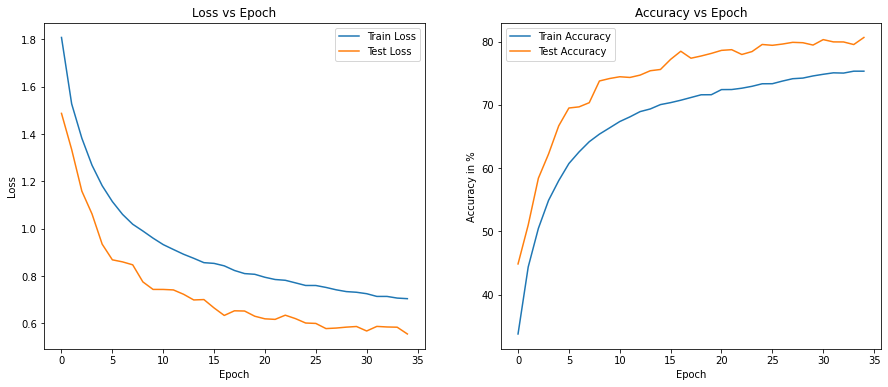

<Figure size 432x288 with 0 Axes>

In [14]:
draw_loss_accuracy_graph(train_loss, test_loss, train_accuracy, test_accuracy)

### Misclassified Images

In [15]:
label_incorrect, prediction_incorrect, images_incorrect = capture_incorrect_classified_samples(model, device, test_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

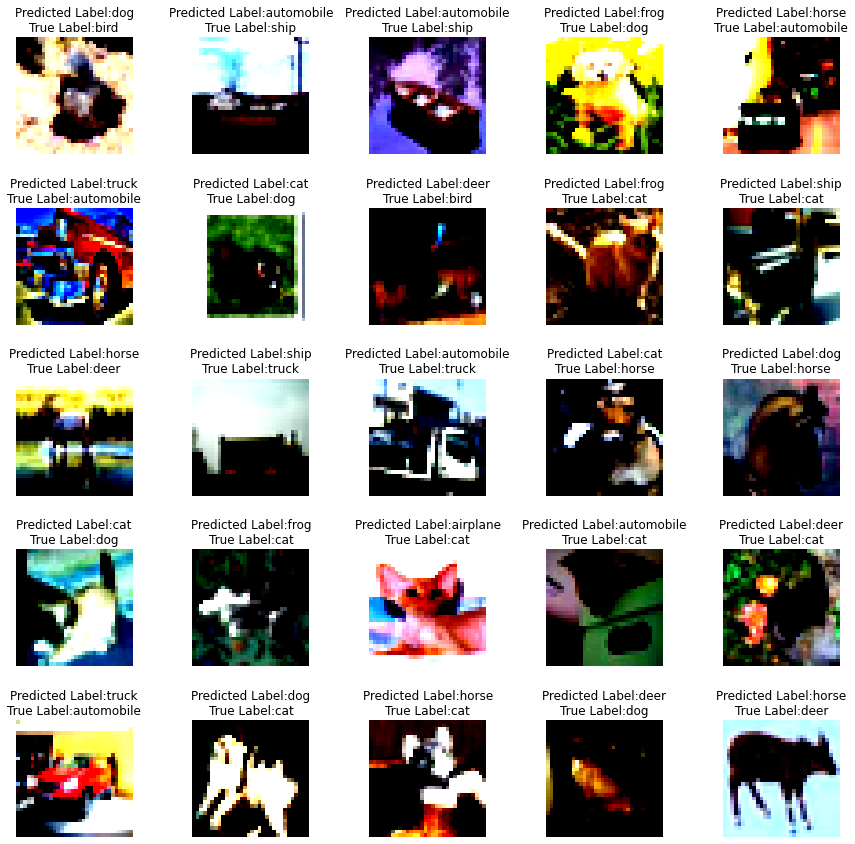

In [16]:
show_incorrect_images(label_incorrect, prediction_incorrect, images_incorrect, classes)